<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/Telecommunication_churn_analysis_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv

--2024-05-05 08:26:01--  https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 947.71K  5.75MB/s    in 0.2s    

2024-05-05 08:26:02 (5.75 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [970457/970457]



In [4]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
data.shape

(7043, 21)

In [7]:
data['Churn'] = data['Churn'].str.replace('Yes', '1').str.replace('No', '0').astype(int)

In [8]:
data = data[data['TotalCharges'].str.contains(".", regex=False)==True]

In [9]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

<ipython-input-9-f656d0bcc8c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalCharges'] = data['TotalCharges'].astype(float)


In [10]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6708 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6708 non-null   object 
 1   gender            6708 non-null   object 
 2   SeniorCitizen     6708 non-null   int64  
 3   Partner           6708 non-null   object 
 4   Dependents        6708 non-null   object 
 5   tenure            6708 non-null   int64  
 6   PhoneService      6708 non-null   object 
 7   MultipleLines     6708 non-null   object 
 8   InternetService   6708 non-null   object 
 9   OnlineSecurity    6708 non-null   object 
 10  OnlineBackup      6708 non-null   object 
 11  DeviceProtection  6708 non-null   object 
 12  TechSupport       6708 non-null   object 
 13  StreamingTV       6708 non-null   object 
 14  StreamingMovies   6708 non-null   object 
 15  Contract          6708 non-null   object 
 16  PaperlessBilling  6708 non-null   object 
 17  

In [12]:
data = data.drop(['customerID'], axis = 1)

In [13]:
X = data.drop(['Churn'], axis = 1)
y= data['Churn']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [17]:
num_features = X.select_dtypes(include= [np.number]).columns
cat_features = X.select_dtypes(exclude= [np.number]).columns

In [18]:
num = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
])

cat = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('one_hot', OrdinalEncoder())
])

In [19]:
transformer = ColumnTransformer([
    ('numerics', num, num_features),
    ('category', cat, cat_features)
], remainder = 'passthrough')

In [20]:
classifier = RandomForestClassifier(n_estimators = 50)

In [21]:
full_pipeline_classifier = Pipeline([
    ('preprocessing', transformer),
    ('classifier', classifier)
])

In [22]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2188,Female,0,No,No,29,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,31.20,926.20
5935,Male,1,No,No,13,Yes,No,DSL,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,59.90,788.35
1873,Female,0,Yes,Yes,72,Yes,No,DSL,Yes,Yes,Yes,No,Yes,No,Two year,Yes,Credit card (automatic),70.65,5011.15
3058,Female,0,No,Yes,17,Yes,Yes,DSL,No,No,Yes,No,No,No,One year,Yes,Mailed check,55.85,937.50
4633,Female,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.05,1709.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,Female,0,Yes,Yes,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.35,275.90
3314,Female,0,No,No,37,Yes,No,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Electronic check,80.05,3019.10
4347,Female,0,No,No,50,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Mailed check,100.20,5038.45
1121,Female,0,No,No,50,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),82.50,4179.10


In [23]:
cat_features, num_features

(Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'),
 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))

In [24]:
full_pipeline_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot',
                                                                   OrdinalEncoder())]),
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(n_estimators=50))])

In [25]:
full_pipeline_classifier.score(X_train, y_train)

0.997018263138278

In [26]:
full_pipeline_classifier.score(X_test, y_test)

0.789865871833085

In [27]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier

In [54]:
voting_classifier = VotingClassifier(estimators=[
    ('rfc', RandomForestClassifier()),
    ('sgd', SGDClassifier(loss='log_loss')),
    ('exTree', ExtraTreesClassifier())], voting='soft'
)


full_pipeline_voting_classifier = Pipeline([
    ('preprocessing', transformer),
    ('classifier', voting_classifier)
])

In [29]:
full_pipeline_voting_classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent...
                                                  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('rfc', RandomForestClassifier()),
                                              ('sgd',
                                               SGDClassifier(loss='log_loss')),
                                              ('exTree',
                                               ExtraTreesClassifier())],
                                  voting='soft'))])

In [40]:
full_pipeline_voting_classifier.score(X_train, y_train), full_pipeline_voting_classifier.score(X_test, y_test)

(0.9975773387998509, 0.7988077496274217)

In [30]:
named_estimators = full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_
named_estimators

{'rfc': RandomForestClassifier(),
 'sgd': SGDClassifier(loss='log_loss'),
 'exTree': ExtraTreesClassifier()}

In [31]:
for name, clf in named_estimators.items():
  full_pipeline_clf = Pipeline([
    ('preprocessing', transformer),
    ('classifier', clf)]).fit(X_train, y_train)
  print(name, '_train =', full_pipeline_clf.score(X_train, y_train), name, '_test =', full_pipeline_clf.score(X_test, y_test))

rfc _train = 0.9975773387998509 rfc _test = 0.793591654247392
sgd _train = 0.7909057025717481 sgd _test = 0.7913561847988078
exTree _train = 0.9975773387998509 exTree _test = 0.7786885245901639


In [32]:
print(f'Train score = {full_pipeline_voting_classifier.score(X_train, y_train)}, test score = {full_pipeline_voting_classifier.score(X_test, y_test)}')

Train score = 0.9975773387998509, test score = 0.7988077496274217


In [33]:
for score, name in zip(full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_['rfc'].feature_importances_, X_train.columns):
  print(round(score, 2)*100,'%', name)

2.0 % gender
16.0 % SeniorCitizen
18.0 % Partner
19.0 % Dependents
3.0 % tenure
2.0 % PhoneService
2.0 % MultipleLines
1.0 % InternetService
2.0 % OnlineSecurity
3.0 % OnlineBackup
5.0 % DeviceProtection
3.0 % TechSupport
2.0 % StreamingTV
5.0 % StreamingMovies
2.0 % Contract
2.0 % PaperlessBilling
7.000000000000001 % PaymentMethod
3.0 % MonthlyCharges
5.0 % TotalCharges


In [34]:
for score, name in zip(full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_['exTree'].feature_importances_, X_train.columns):
  print(round(score, 2)*100,'%', name)

3.0 % gender
14.000000000000002 % SeniorCitizen
13.0 % Partner
15.0 % Dependents
4.0 % tenure
3.0 % PhoneService
2.0 % MultipleLines
1.0 % InternetService
3.0 % OnlineSecurity
4.0 % OnlineBackup
5.0 % DeviceProtection
4.0 % TechSupport
3.0 % StreamingTV
4.0 % StreamingMovies
2.0 % Contract
3.0 % PaperlessBilling
8.0 % PaymentMethod
3.0 % MonthlyCharges
6.0 % TotalCharges


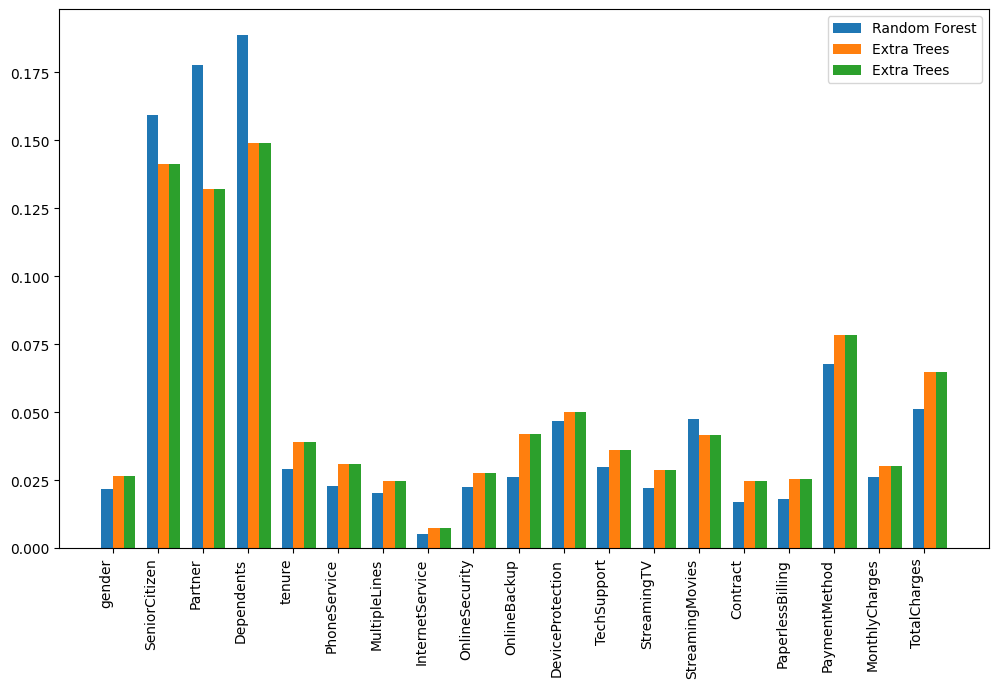

In [42]:
# Get feature importances if available
try:
    # RandomForestClassifier feature importances
    rfc_importances = full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_['rfc'].feature_importances_

    # ExtraTreesClassifier feature importances
    exTree_importances = full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_['exTree'].feature_importances_
except AttributeError as e:
    print(f"Error accessing feature importances: {e}")
    rfc_importances = None
    exTree_importances = None

    # ExtraTreesClassifier feature importances
    exTree_importances = full_pipeline_voting_classifier.named_steps['classifier'].named_estimators_['sgd'].feature_importances_
except AttributeError as s:
    print(f"Error accessing feature importances: {s}")
    rfc_importances = None
    exTree_importances = None
    sgd_importances = None

# Combine feature names for Random Forest and Extra Trees
feature_names_combined = [f"{name}" for name in X_train.columns]

# Plotting code for multiple bar chart
num_features = len(rfc_importances)
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 7))
bar1 = ax.bar(np.arange(num_features), rfc_importances, bar_width, label='Random Forest')
bar2 = ax.bar(np.arange(num_features) + bar_width, exTree_importances, bar_width, label='Extra Trees')
bar3 = ax.bar(np.arange(num_features) + 2 * bar_width, exTree_importances, bar_width, label='Extra Trees')

# Add labels to the x-axis ticks
ax.set_xticks(np.arange(num_features) + bar_width / 2)
ax.set_xticklabels(feature_names_combined, rotation=90, ha='right')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {'classifier__sgd__loss':['log_loss', 'modified_huber'],
              'classifier__sgd__penalty':['l2', 'l1', 'elasticnet'],
              'classifier__rfc__criterion':['gini', 'entropy', 'log_loss'],
              'classifier__rfc__max_features':['sqrt', 'log2'],
              'classifier__rfc__n_estimators':[100, 200, 300],
              'classifier__exTree__criterion': ['gini', 'entropy', 'log_loss']




}

gscv = GridSearchCV(full_pipeline_voting_classifier, param_grid, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerics',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                                        ('category',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImp...
                                                         voting='soft'))]),
             param_grid={'classifier__exTree__criterion': ['gini', 'entropy',
                                                           'log_loss'],
                         'classifier__rfc__criterion': ['gini', 'entropy',
                                                        'log_loss'],
                         'classifier__rfc__max_features': ['sqrt', 'log2'],
                         'classifier__rfc__n_estimators': [100, 200, 300],
                         'classifier__sgd__loss': ['log_loss',
                                                   'modified_huber'],
                         'classifier__sgd__penalty': ['l2', 'l1',
                                                      'elasticnet']})

In [63]:
gscv.best_params_

{'classifier__exTree__criterion': 'entropy',
 'classifier__rfc__criterion': 'log_loss',
 'classifier__rfc__max_features': 'log2',
 'classifier__rfc__n_estimators': 300,
 'classifier__sgd__loss': 'log_loss',
 'classifier__sgd__penalty': 'elasticnet'}

In [64]:
gscv.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent...
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 VotingClassifier(estimators=[('rfc',
                                               RandomForestClassifier(criterion='log_loss',
                                                                      max_features='log2',
                                                                      n_estimators=300)),
                                              ('sgd',
                                               SGDClassifier(loss='log_loss',
                                                             penalty='elasticnet')),
                                              ('exTree',
                                               ExtraTreesClassifier(criterion='entropy'))],
                                  voting='soft'))])

In [65]:
gscv.best_estimator_.score(X_train, y_train), gscv.best_estimator_.score(X_test, y_test)

(0.9973909802459933, 0.793591654247392)